In [35]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('../data/new_usgs_small.csv')
df.dropna(inplace=True)
df.head()

In [ ]:
df = df[["time", "latitude", "longitude", "mag"]]

In [ ]:
df["time"] = df["time"].apply(lambda x: x[:7])
df

,time,latitude,longitude,mag
0,1949-12,34.191167,-117.522000,2.58
1,1949-12,35.859333,-117.650667,2.01
2,1949-12,32.143333,-116.628833,3.30
3,1949-12,33.856167,-118.089333,1.83
4,1949-12,32.113000,-116.806333,3.02
...,...,...,...,...
4293100,2023-09,17.937167,-66.917667,2.28
4293101,2023-09,60.279600,-147.859600,2.00
4293102,2023-09,33.486000,-116.586500,0.64
4293103,2023-09,35.348667,-97.926667,0.84


In [ ]:
time_cut = "1973-01"
df = df[df["time"] > time_cut]
df["energy"] = 10**(1.44*df["mag"]+5.24)
df["label"] = np.where(df["mag"] > 5, 1, 0)

In [ ]:
df["time"].min(), df["time"].max()

('1973-02', '2023-10')

In [ ]:
geo_split = 1

In [ ]:
df["latitude"] = df["latitude"] // geo_split
df["latitude"] = df["latitude"] + np.abs(np.min(df["latitude"]))

df["longitude"] = df["longitude"] // geo_split
df["longitude"] = df["longitude"] + np.abs(np.min(df["longitude"]))
df["pos"] = df["latitude"].astype(str) + "_" + df["longitude"].astype(str)

In [ ]:
def filter_regions(df: pd.DataFrame, threshold: int) -> pd.DataFrame:
    tmp = []
    df_f = df[df["mag"] > 5]
    df_agg = df_f.groupby(["pos"])["mag"].count().reset_index()
    for _, row in df_agg.iterrows():
        if row["mag"] >= threshold:
            tmp.append(row["pos"])
    df = df[df["pos"].isin(tmp)]
    return df

In [ ]:
n = 40

In [ ]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["latitude", "longitude"]).agg({"energy": "sum", "label": "sum"}).reset_index()
    counts.append(len(df_agg))

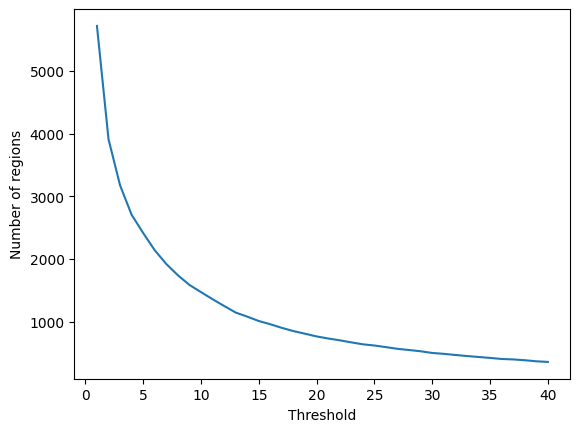

In [ ]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

In [ ]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    counts.append(len(df_filter))

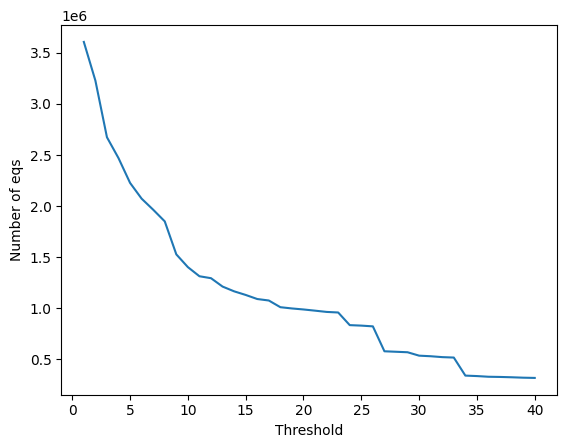

In [ ]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of eqs")
plt.show()

In [ ]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["latitude", "longitude", "time"]).agg({"energy": "sum", "label": "sum"}).reset_index()
    counts.append(len(df_agg))

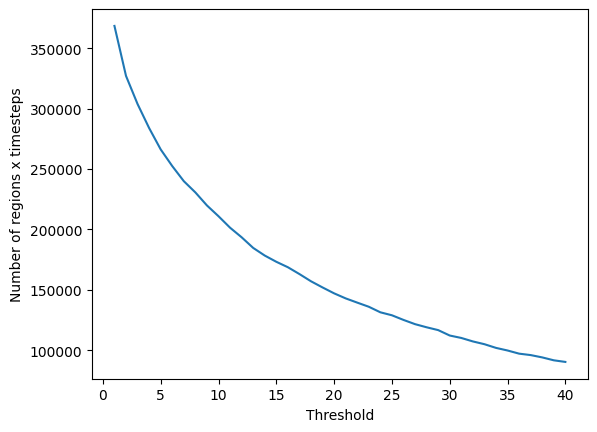

In [ ]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of regions x timesteps")
plt.show()

In [ ]:
n = 200

In [ ]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["latitude", "longitude"]).agg({"energy": "sum", "label": "sum"}).reset_index()
    counts.append(len(df_agg))

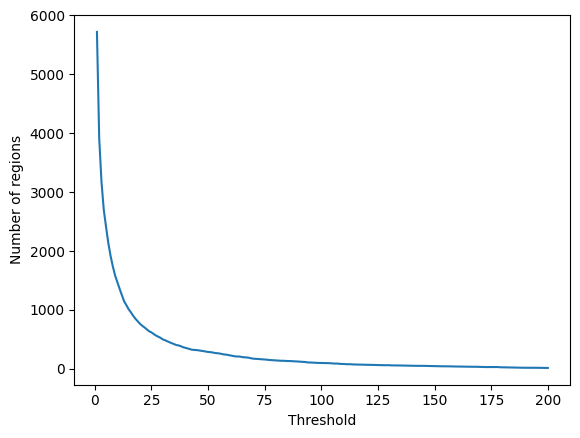

In [ ]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

In [ ]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    counts.append(len(df_filter))

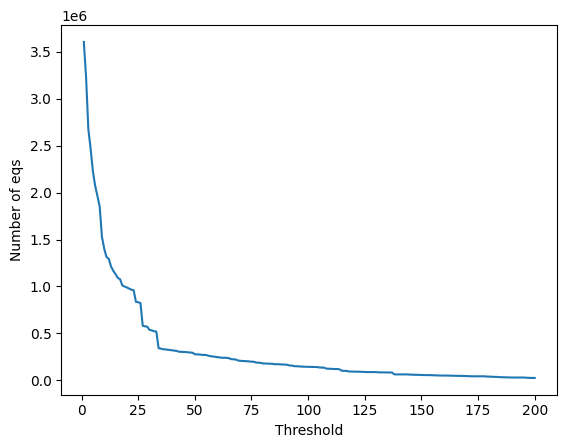

In [ ]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of eqs")
plt.show()

In [ ]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["latitude", "longitude", "time"]).agg({"energy": "sum", "label": "sum"}).reset_index()
    counts.append(len(df_agg))

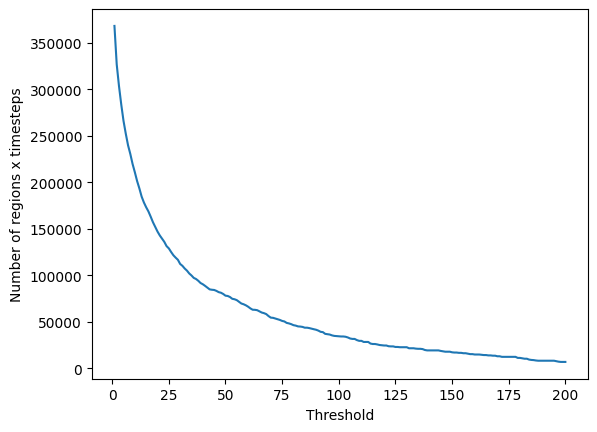

In [ ]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of regions x timesteps")
plt.show()

# STEAD

In [ ]:
df = pd.read_csv('../data/merge.csv')
df.head()

In [25]:
df = df[df["trace_category"] == 'earthquake_local']
df.rename(columns={"source_latitude": "latitude", "source_longitude": "longitude", "source_magnitude": "mag", "trace_start_time": "time"}, inplace=True)

In [26]:
df = df[["time", "latitude", "longitude", "mag"]]

In [27]:
df["time"] = pd.to_datetime(df["time"], format="mixed")
df

,time,latitude,longitude,mag
235426,2006-07-23 15:59:00.960,33.74960,-117.49380,3.60
235427,2006-11-03 15:56:53.610,32.70770,-116.04460,4.30
235428,2006-11-03 16:12:24.700,32.72530,-116.03480,3.60
235429,2006-11-14 13:32:22.540,32.70630,-116.02410,3.80
235430,2006-11-27 10:46:41.060,31.96790,-117.19440,3.60
...,...,...,...,...
1265652,2017-06-21 09:40:43.810,44.77950,-111.03833,0.39
1265653,2017-06-21 12:21:05.390,44.76967,-110.99700,1.72
1265654,2017-06-21 12:23:40.200,44.77100,-110.99900,1.61
1265655,2017-06-21 13:34:40.330,44.77567,-111.03983,1.25


In [28]:
time_cut = dt.datetime(2004, 1, 1)
df = df[df["time"] > time_cut]
df["energy"] = 10**(1.44*df["mag"]+5.24)
df["label"] = np.where(df["mag"] > 5, 1, 0)

In [29]:
# keep only year and month in time
df["time"] = df["time"].dt.strftime('%Y-%m')

In [30]:
df["latitude"] = (df["latitude"] // geo_split).astype(int)
df["latitude"] = df["latitude"] + np.abs(np.min(df["latitude"]))

df["longitude"] = (df["longitude"] // geo_split).astype(int)
df["longitude"] = df["longitude"] + np.abs(np.min(df["longitude"]))
df["pos"] = df["latitude"].astype(str) + "_" + df["longitude"].astype(str)

In [31]:
n = 40

In [32]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["latitude", "longitude"]).agg({"energy": "sum", "label": "sum"}).reset_index()
    counts.append(len(df_agg))

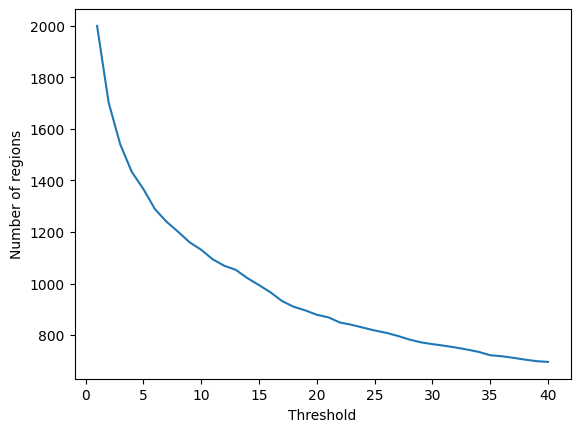

In [33]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

In [34]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["latitude", "longitude", "time"]).agg({"energy": "sum", "label": "sum"}).reset_index()
    counts.append(len(df_agg))

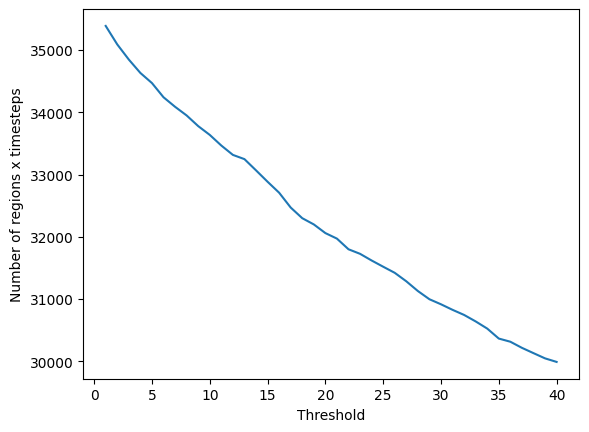

In [35]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of regions x timesteps")
plt.show()

In [36]:
n = 200

In [37]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["latitude", "longitude"]).agg({"energy": "sum", "label": "sum"}).reset_index()
    counts.append(len(df_agg))

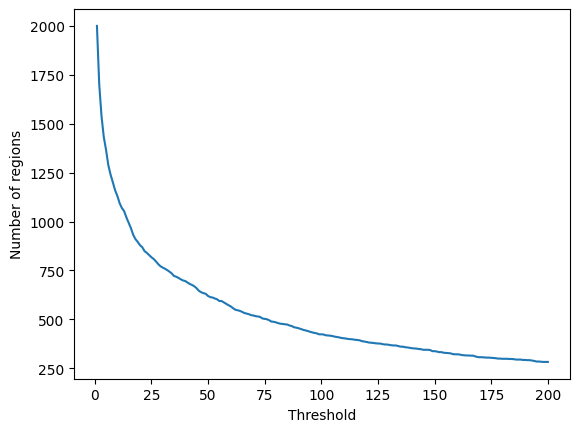

In [38]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

In [39]:
counts = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["latitude", "longitude", "time"]).agg({"energy": "sum", "label": "sum"}).reset_index()
    counts.append(len(df_agg))

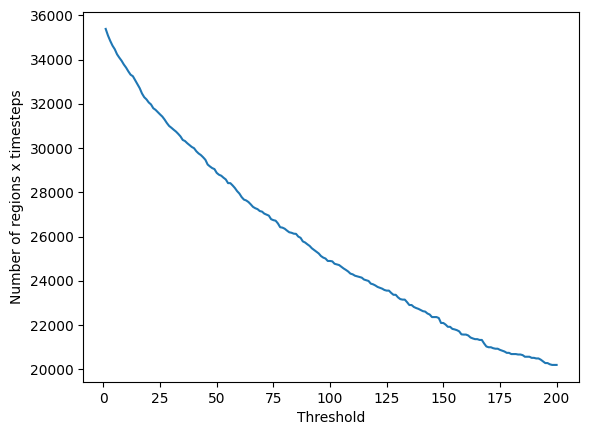

In [40]:
# plot counts
plt.plot(np.linspace(1, n, n), counts)
plt.xlabel("Threshold")
plt.ylabel("Number of regions x timesteps")
plt.show()